## Libraries and data

Podkręcić Bayesa, sprawdzić linear kernel, postarać się o lepszą klasyfikacje poprzez poszukiwanie hiperparametrów. Zmiana sposobu reprezentacji np doctowek
Transformer? Podziałać na poziomie reprezentacji tekstu i klasyfikatora tak aby spróbować osiągnąć lepsze wyniki klasyfikacji. Może jeszcze jeden zbiór danych np reuters. W sprawozdzaniu odnieść się do rezultatów z publikacji -> poszukać

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
# returs weight of words (?) need to check in docs
# i.e word from has really low weight cause it is in every article
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

from sklearn.datasets import fetch_20newsgroups

from tensorflow.keras.utils import get_file

# import tensorflow_hub as hub
# import tensorflow_text  
import re
import string

In [2]:
# info about dataset
print(fetch_20newsgroups().DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [3]:
# Prepare data

corpus = fetch_20newsgroups()
categories = fetch_20newsgroups()["target_names"]
train_set = fetch_20newsgroups(subset = 'train', categories = categories)
test_set = fetch_20newsgroups(subset = 'test', categories = categories)

X_train = train_set.data
y_train = train_set.target

X_test = test_set.data
y_test = test_set.target


sample = 32

# show sample of train_set
print("LABEL: {}".format(categories[y_train[sample]]))
print(X_train[sample])

LABEL: sci.electronics
From: xandor@unixg.ubc.ca (John Gilbert )
Subject: Re: Exploding TV!
Organization: The University of British Columbia
Lines: 4
Distribution: usa
NNTP-Posting-Host: unixg.ubc.ca

 Just as a not of possible interest on this subject ..
It is my understanding that exploding televisions were a major cause of
domestic accidents in the Soviet Union in past years!
  



# Classification by using `CountVectorizer()` and `TfidfTransformer()` as a text representation

### Load data for Naive Bayes

In [ ]:
text_clf = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())
    ]
)

text_clf = text_clf.fit(X_train, y_train)

## Predict output + confussion matrix

Text(350.553125, 0.5, 'predicted label')

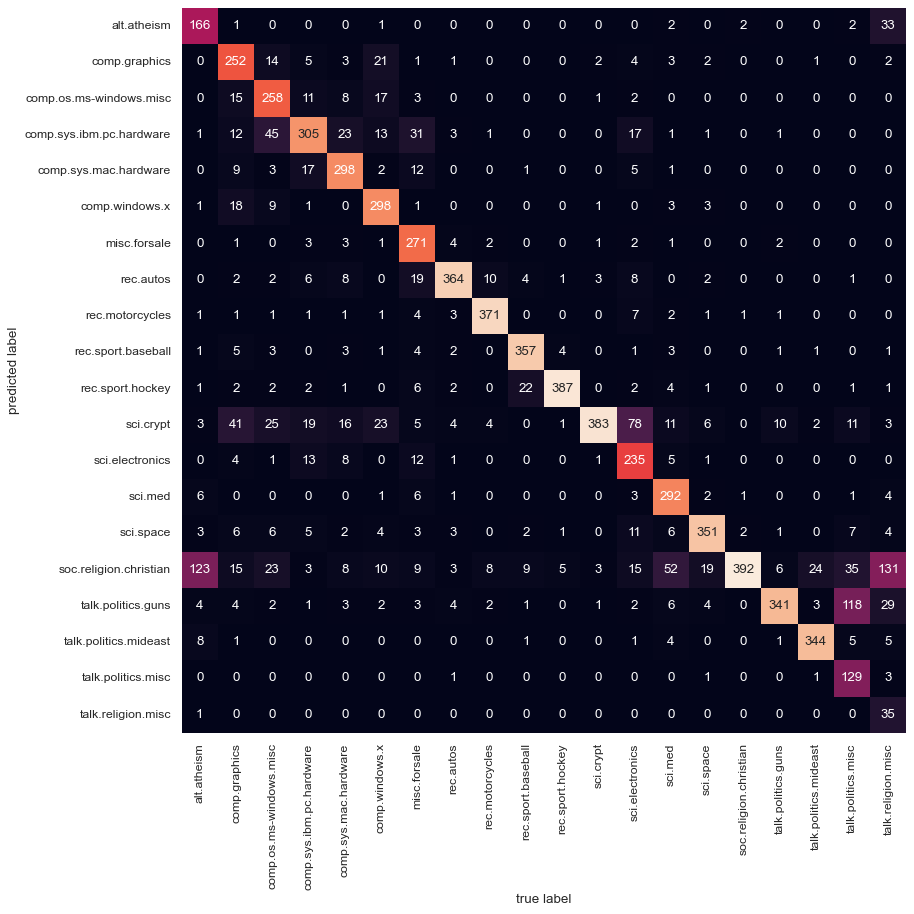

In [ ]:
y_pred = text_clf.predict(X_test)

figure(figsize=(18, 12), dpi=80)
x_axis_labels = categories

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square = True, annot=True, fmt = 'd', cbar = False, xticklabels = x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')



## Metrics for Naive Bayes

In [ ]:
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
naive_bayes_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Results for Naive Bayes classifier:")
print("Accuracy: {0:.3f} % ".format(naive_bayes_accuracy * 100))
print("Weighted f1 score: {0:.3f}".format(naive_bayes_f1_score))

Results for Naive Bayes classifier:
Accuracy: 0.774
Weighted f1 score: 0.768


# CREATE SVM CLASSIFIER

In [ ]:
clf_svm_basic = SVC()

text_clf_svm = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', clf_svm_basic)
    ]
)

text_clf_svm = text_clf_svm.fit(X_train, y_train)

Text(350.553125, 0.5, 'predicted label')

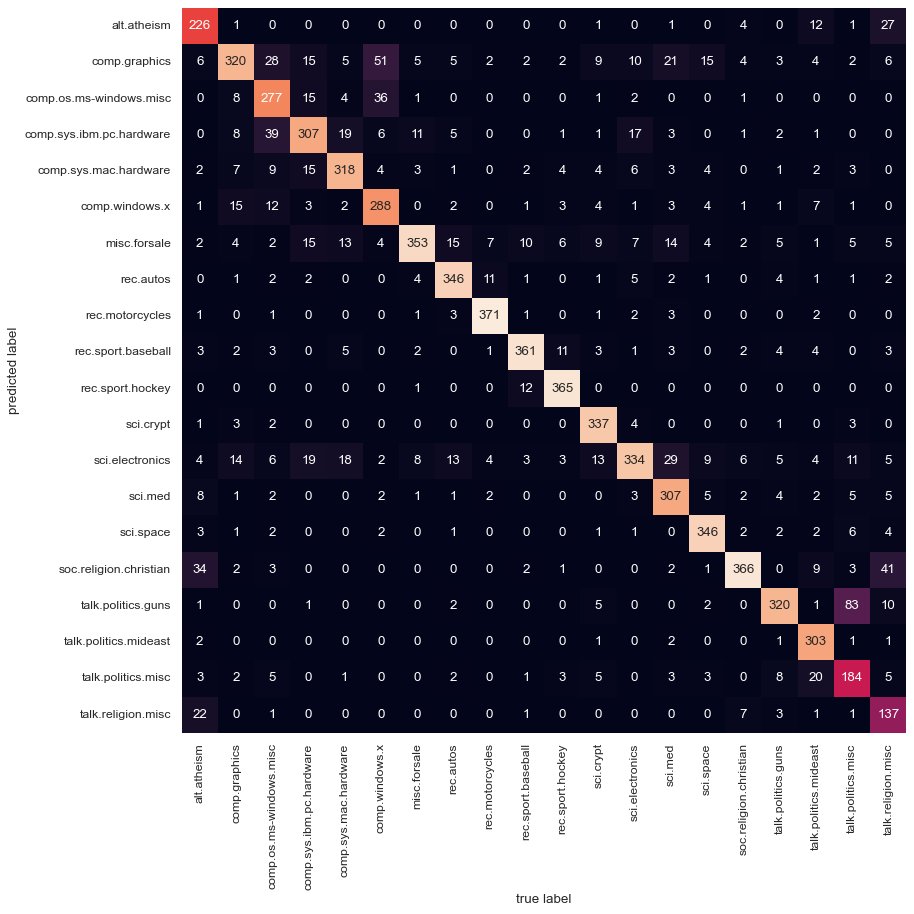

In [ ]:
y_pred = text_clf_svm.predict(X_test)

figure(figsize=(18, 12), dpi=80)
x_axis_labels = categories

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square = True, annot=True, fmt = 'd', cbar = False, xticklabels = x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
svm_basic_accuracy = accuracy_score(y_test, y_pred)
svm_basic_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Results for basic SVM classifier:")
print("Accuracy: {0:.3f} %".format(svm_basic_accuracy * 100))
print("Weighted f1 score: {0:.3f}".format(svm_basic_f1_score))

Results for Naive Bayes classifier:
Accuracy: 0.819
Weighted f1 score: 0.819


## LINEAR SVM
Use the linear kernel for the classification by using `CountVectorizer()` and `TfidfTransformer()` as the text representation

MODEL IS TRAINED...
MAKING PREDICTIONS...
METRICS...
Results for basic SVM classifier:
Accuracy: 83.471 %
Weighted f1 score: 0.835


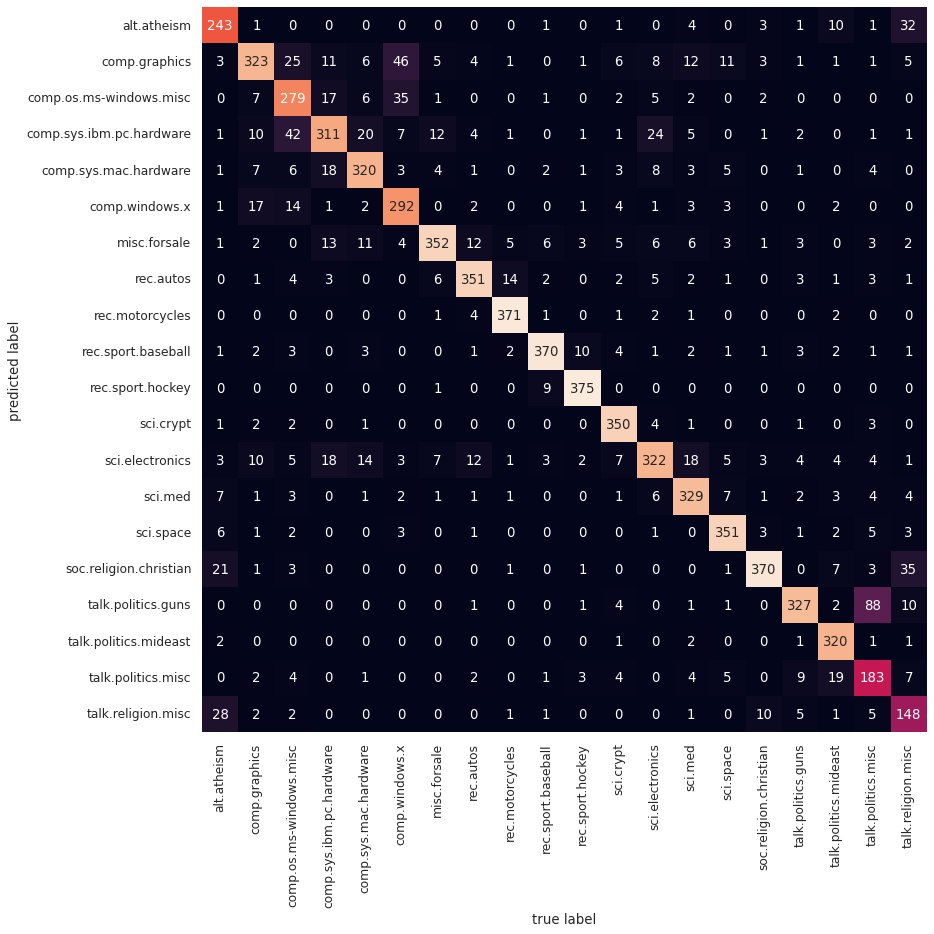

In [5]:
clf_svm_linear = SVC(kernel = 'linear')

text_clf_linear = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', clf_svm_linear)
    ]
)

print('MODEL IS TRAINED...')
text_clf_linear = text_clf_linear.fit(X_train, y_train)

# Prediction
print('MAKING PREDICTIONS...')
y_pred = text_clf_linear.predict(X_test)

figure(figsize=(18, 12), dpi=80)
x_axis_labels = categories

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square = True, annot=True, fmt = 'd', cbar = False, xticklabels = x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Metrics
print('METRICS...')
svm_basic_linear = accuracy_score(y_test, y_pred)
svm_linear_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Results for basic SVM classifier:")
print("Accuracy: {0:.3f} %".format(svm_basic_linear * 100))
print("Weighted f1 score: {0:.3f}".format(svm_linear_f1_score))


## KUBA ZRÓB TO SAMO CO WYŻEJ TYLKO najpierw. analiza dla różnych funckji jądra,a potem uzyj funcji clean_text z clea_text,py, wyszczyść te dane wszytskie z nagłówków itp (funcksja zrobi to sama) i rzetestuje wszytskie warianty raz jeszcze zeby mievc wyniki klasyfikacji, jak cos to pisz/dziownx xd
tak to zrobiłem w drugim pliku </br>
`
X_train = [clean_text(x_train) for x_train in X_train]
`
</br>
`
X_test = [clean_text(x_test) for x_test in X_test]
`